# Loan Status Prediction

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
lending_df = pd.read_csv('final_loans_data.csv')
lending_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,application_type
0,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,INDIVIDUAL
1,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,INDIVIDUAL
2,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,...,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,INDIVIDUAL
3,1075269,1311441,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-2015,161.03,Jan-2016,679.0,675.0,INDIVIDUAL
4,1069639,1304742,7000.0,7000.0,7000.0,60,15.96,170.08,C,C5,...,3137.84,0.00,0.00,0.00,May-2016,1313.76,Sep-2016,654.0,650.0,INDIVIDUAL


In [111]:
lending_df.shape

(38433, 49)

## Data preparation

In [112]:
lending_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'application_type'],
      dtype='object')

In [113]:
cols = ['loan_amnt',
        'installment',
        'annual_inc',
        'verification_status',
        'loan_status',
        'home_ownership',
        'dti',
        'grade',
        'purpose',
        'delinq_2yrs',
        'fico_range_low',
        'fico_range_high',
        'inq_last_6mths',
        'open_acc',
        'pub_rec',
        'revol_bal',
        'total_acc',
        'term',
        'emp_length',
        'revol_util'
        ]

In [114]:
lending_df = lending_df[cols]

In [115]:
lending_df = lending_df[(lending_df['loan_status'] == 'Fully Paid' ) | (lending_df['loan_status'] == 'Charged Off')]

In [116]:
lending_df.head()

,loan_amnt,installment,annual_inc,verification_status,loan_status,home_ownership,dti,grade,purpose,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,term,emp_length,revol_util
0,2500.0,59.83,30000.0,Source Verified,Charged Off,RENT,1.00,C,car,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,4.0,60,0,9.4
1,10000.0,339.31,49200.0,Source Verified,Fully Paid,RENT,20.00,C,other,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,37.0,36,10,21.0
3,5000.0,156.46,36000.0,Source Verified,Fully Paid,RENT,11.20,A,wedding,0.0,730.0,734.0,3.0,9.0,0.0,7963.0,12.0,36,3,28.3
4,7000.0,170.08,47004.0,Not Verified,Fully Paid,RENT,23.51,C,debt_consolidation,0.0,690.0,694.0,1.0,7.0,0.0,17726.0,11.0,60,8,85.6
5,3000.0,109.43,48000.0,Source Verified,Fully Paid,RENT,5.35,E,car,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,4.0,36,9,87.5


## Input and Output data

In [117]:
input_df  = lending_df.drop(columns = ['loan_status'], axis=1)
output_df = lending_df['loan_status']

In [118]:
input_df.head()

,loan_amnt,installment,annual_inc,verification_status,home_ownership,dti,grade,purpose,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,term,emp_length,revol_util
0,2500.0,59.83,30000.0,Source Verified,RENT,1.00,C,car,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,4.0,60,0,9.4
1,10000.0,339.31,49200.0,Source Verified,RENT,20.00,C,other,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,37.0,36,10,21.0
3,5000.0,156.46,36000.0,Source Verified,RENT,11.20,A,wedding,0.0,730.0,734.0,3.0,9.0,0.0,7963.0,12.0,36,3,28.3
4,7000.0,170.08,47004.0,Not Verified,RENT,23.51,C,debt_consolidation,0.0,690.0,694.0,1.0,7.0,0.0,17726.0,11.0,60,8,85.6
5,3000.0,109.43,48000.0,Source Verified,RENT,5.35,E,car,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,4.0,36,9,87.5


In [119]:
input_df.shape , output_df.shape

((35986, 19), (35986,))

## Handling categorical columns

In [120]:
categorical_clos = ['home_ownership',
                  'grade',
                  'verification_status',
                  'purpose'
                 ]

In [121]:
dummy_df = pd.get_dummies(input_df[categorical_clos])

In [122]:
input_df = pd.concat([input_df, dummy_df], axis=1)

In [123]:
input_df.drop(columns=categorical_clos, axis=1, inplace=True)

In [124]:
input_df

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,2500.0,59.83,30000.00,1.00,0.0,740.0,744.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,10000.0,339.31,49200.00,20.00,0.0,690.0,694.0,1.0,10.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,5000.0,156.46,36000.00,11.20,0.0,730.0,734.0,3.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,7000.0,170.08,47004.00,23.51,0.0,690.0,694.0,1.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,3000.0,109.43,48000.00,5.35,0.0,660.0,664.0,2.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36487,7500.0,241.41,96000.00,2.69,0.0,710.0,714.0,0.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
36488,12000.0,381.66,100671.39,6.64,0.0,720.0,724.0,0.0,16.0,1.0,...,0,0,0,0,0,0,0,0,0,0
36489,12375.0,404.62,80000.00,9.23,0.0,685.0,689.0,0.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
36490,4800.0,155.52,35000.00,7.51,0.0,685.0,689.0,0.0,11.0,1.0,...,0,0,0,0,0,0,0,0,0,0


## Training & Testing Split

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.25)

In [127]:
x_train.shape

(26989, 43)

In [128]:
x_test.shape

(8997, 43)

## Logistic Regression Model

In [129]:
from sklearn.linear_model import LogisticRegression

In [133]:
logistic_model = LogisticRegression()

In [134]:
logistic_model.fit(x_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [135]:
train_pred = logistic_model.predict(x_train)

In [138]:
test_pred = logistic_model.predict(x_test)

## Accuracy Score

In [136]:
from sklearn import metrics

In [140]:
print("Training Accuracy :",metrics.accuracy_score(y_train, train_pred)*100)

Training Accuracy : 86.09433472896364


In [141]:
print("Testing Accuracy :", metrics.accuracy_score(y_test, test_pred)*100)

Testing Accuracy : 86.50661331554963


## Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
tree_model = DecisionTreeClassifier(criterion='gini' ,max_depth = 5)

In [144]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

## prediction tree

In [145]:
train_pred1 = tree_model.predict(x_train)

In [147]:
test_pred1 = tree_model.predict(x_test)

## Accuracy score


In [148]:
print("Training Accuracy :",metrics.accuracy_score(y_train, train_pred1)*100)

Training Accuracy : 86.19808069954425


In [149]:
print("Testing Accuracy :", metrics.accuracy_score(y_test, test_pred1)*100)

Testing Accuracy : 86.45103923530066


In [152]:
from sklearn.tree import plot_tree

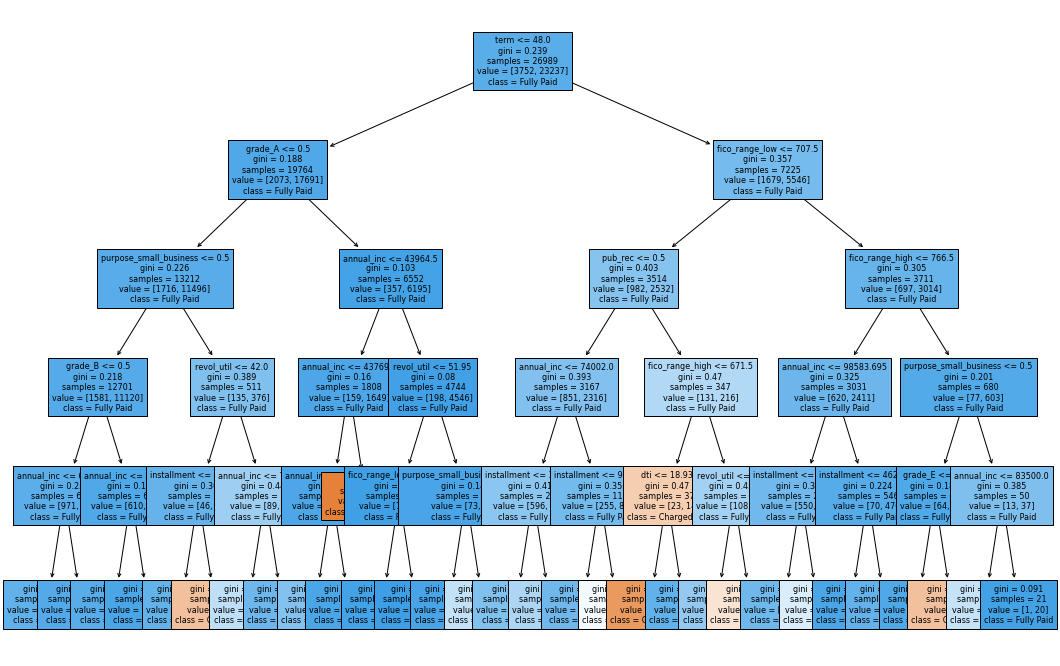

In [156]:
plt.figure(figsize=(18,12))
plot_tree(tree_model,feature_names = input_df.columns, class_names=output_df, filled=True, fontsize=8)
plt.show()